# EDA and Modeling of Road Accidents Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Import Data

In [2]:
df_acc17_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2017.csv')
df_acc18_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2018.csv')
df_acc19_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2019.csv')
df_acc20_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2020.csv')
df_acc21_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2021.csv')


/var/folders/gr/qbhbzltn5dq7hxmnmds25cd40000gn/T/ipykernel_93023/1880561847.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acc17_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2017.csv')
/var/folders/gr/qbhbzltn5dq7hxmnmds25cd40000gn/T/ipykernel_93023/1880561847.py:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acc18_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2018.csv')
/var/folders/gr/qbhbzltn5dq7hxmnmds25cd40000gn/T/ipykernel_93023/1880561847.py:3: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_acc19_raw = pd.read_csv('../data/raw/dft-road-casualty-statistics-accident-2019.csv')
/var/folders/gr/qbhbzltn5dq7hxmnmds25cd40000gn/T/ipykernel_93023/1880561847.py:4: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_me

In [3]:
print("Count of row and columns: road casualty statistics accident 2017")
df_acc17_raw.shape

Count of row and columns: road casualty statistics accident 2017


(129982, 36)

In [4]:
print("Count of row and columns: road casualty statistics accident 2018")
df_acc18_raw.shape

Count of row and columns: road casualty statistics accident 2018


(122635, 36)

In [5]:
print("Count of row and columns: road casualty statistics accident 2019")
df_acc19_raw.shape

Count of row and columns: road casualty statistics accident 2019


(117536, 36)

In [6]:
print("Count of row and columns - road casualty statistics accident 2020")
df_acc20_raw.shape

Count of row and columns - road casualty statistics accident 2020


(91199, 36)

In [7]:
print("Count of row and columns: road casualty statistics accident 2021")
df_acc21_raw.shape

Count of row and columns: road casualty statistics accident 2021


(101087, 36)

In [8]:
df_acc17_raw.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2017010001708,2017,10001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,...,0,4,1,1,0,0,1,1,2,E01001450
1,2017010009342,2017,10009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,...,0,4,1,2,0,0,1,1,2,E01004702
2,2017010009344,2017,10009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,...,0,4,1,1,0,0,1,1,2,E01004298
3,2017010009348,2017,10009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,...,4,4,2,2,0,0,1,1,2,E01001429
4,2017010009350,2017,10009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,...,5,4,1,2,0,0,1,1,2,E01001808


In [9]:
df_acc18_raw.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2018010080971,2018,10080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000854
1,2018010080973,2018,10080973,542020.0,184290.0,0.046471,51.539651,1,3,1,...,0,4,1,1,0,0,1,1,2,E01003531
2,2018010080974,2018,10080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,...,5,4,1,1,0,0,1,1,2,E01002723
3,2018010080981,2018,10080981,541450.0,183220.0,0.037828,51.530179,1,2,2,...,5,4,2,2,0,0,1,1,2,E01003492
4,2018010080982,2018,10080982,543580.0,176500.0,0.065781,51.469258,1,2,2,...,0,4,1,2,0,0,1,1,2,E01001682


In [10]:
df_acc19_raw.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,9,4,1,1,0,0,1,3,2,E01003117
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000943
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,0,4,1,1,0,0,1,1,2,E01000973
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000546


In [11]:
df_acc20_raw.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2020010219808,2020,10219808,521389.0,175144.0,-0.254001,51.462262,1,3,1,...,9,1,9,9,0,0,1,3,2,E01004576
1,2020010220496,2020,10220496,529337.0,176237.0,-0.139253,51.470327,1,3,1,...,4,1,1,1,0,0,1,1,2,E01003034
2,2020010228005,2020,10228005,526432.0,182761.0,-0.178719,51.529614,1,3,1,...,0,4,1,2,0,0,1,1,2,E01004726
3,2020010228006,2020,10228006,538676.0,184371.0,-0.001683,51.541210,1,2,1,...,4,4,1,1,0,0,1,1,2,E01003617
4,2020010228011,2020,10228011,529324.0,181286.0,-0.137592,51.515704,1,3,1,...,0,4,1,1,0,0,1,1,2,E01004763


In [12]:
df_acc21_raw.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608


##### Combine data from 2018, 2019, 2020 and 2021

In [13]:
frames_acc = [df_acc18_raw, df_acc19_raw, df_acc20_raw, df_acc21_raw]
df_acc_combined = pd.concat(frames_acc)
print("Count of row and columns: road casualty statistics accident 2018, 2019, 2020 and 2021")
df_acc_combined.shape

Count of row and columns: road casualty statistics accident 2018, 2019, 2020 and 2021


(432457, 36)

In [14]:
df_acc_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432457 entries, 0 to 101086
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               432457 non-null  object 
 1   accident_year                                432457 non-null  int64  
 2   accident_reference                           432457 non-null  object 
 3   location_easting_osgr                        432343 non-null  float64
 4   location_northing_osgr                       432343 non-null  float64
 5   longitude                                    432343 non-null  float64
 6   latitude                                     432343 non-null  float64
 7   police_force                                 432457 non-null  int64  
 8   accident_severity                            432457 non-null  int64  
 9   number_of_vehicles                           432457 non-nul

## Quality Investigation

### Duplicates

In [15]:
# Check number of duplicates
duplicates_count = df_acc_combined.duplicated().sum()
print(f"You have {duplicates_count} duplicates in the raw data.")

# Check number of duplicates while ignoring the accident_reference
duplicates_count = df_acc_combined.drop(labels=["accident_index"], axis=1).duplicated().sum()
print(f"You have {duplicates_count} duplicates in the raw data - ignoring the accident_index (unique ID).")


# Check number of duplicates in accident_index (unique ID)
duplicates_count = df_acc_combined["accident_index"].duplicated().sum()
print(f"You have {duplicates_count} duplicate accident_indexes (unique ID) in the raw data.")

You have 0 duplicates in the raw data.
You have 0 duplicates in the raw data - ignoring the accident_index (unique ID).
You have 0 duplicate accident_indexes (unique ID) in the raw data.


### Missing Values

In [16]:
print("Column Name", "Percent Missing")
df_acc_combined.isnull().sum() / df_acc_combined.shape[0] * 100.00

Column Name Percent Missing


accident_index                                 0.000000
accident_year                                  0.000000
accident_reference                             0.000000
location_easting_osgr                          0.026361
location_northing_osgr                         0.026361
longitude                                      0.026361
latitude                                       0.026361
police_force                                   0.000000
accident_severity                              0.000000
number_of_vehicles                             0.000000
number_of_casualties                           0.000000
date                                           0.000000
day_of_week                                    0.000000
time                                           0.000000
local_authority_district                       0.000000
local_authority_ons_district                   0.000000
local_authority_highway                        0.000000
first_road_class                               0

In [17]:
df_acc_combined.isna().sum()

accident_index                                   0
accident_year                                    0
accident_reference                               0
location_easting_osgr                          114
location_northing_osgr                         114
longitude                                      114
latitude                                       114
police_force                                     0
accident_severity                                0
number_of_vehicles                               0
number_of_casualties                             0
date                                             0
day_of_week                                      0
time                                             0
local_authority_district                         0
local_authority_ons_district                     0
local_authority_highway                          0
first_road_class                                 0
first_road_number                                0
road_type                      

In [18]:
# Recode -1 as missing values

df_acc = df_acc_combined

df_acc['junction_control'] = df_acc['junction_control'].replace(-1,np.nan)
df_acc['junction_detail'] = df_acc['junction_detail'].replace(-1,np.nan)
df_acc['light_conditions'] = df_acc['light_conditions'].replace(-1,np.nan)
df_acc['pedestrian_crossing_human_control'] = df_acc['pedestrian_crossing_human_control'].replace(-1,np.nan)
df_acc['pedestrian_crossing_physical_facilities'] = df_acc['pedestrian_crossing_physical_facilities'].replace(-1,np.nan)
df_acc['did_police_officer_attend_scene_of_accident'] = df_acc['did_police_officer_attend_scene_of_accident'].replace(-1,np.nan)
df_acc['road_type'] = df_acc['road_type'].replace(-1,np.nan)
df_acc['weather_conditions'] = df_acc['weather_conditions'].replace(-1,np.nan)
df_acc['road_surface_conditions'] = df_acc['road_surface_conditions'].replace(-1,np.nan)
df_acc['special_conditions_at_site'] = df_acc['special_conditions_at_site'].replace(-1,np.nan)
df_acc['carriageway_hazards'] = df_acc['carriageway_hazards'].replace(-1,np.nan)
df_acc['trunk_road_flag'] = df_acc['trunk_road_flag'].replace(-1,np.nan)

df_acc[['junction_control', 
        'junction_detail', 
        'light_conditions', 
        'pedestrian_crossing_human_control', 
        'pedestrian_crossing_physical_facilities',
        'did_police_officer_attend_scene_of_accident',
        'road_type',
        'weather_conditions',
        'road_surface_conditions',
        'special_conditions_at_site',
        'carriageway_hazards',
        'trunk_road_flag'
        ]]

,junction_control,junction_detail,light_conditions,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,did_police_officer_attend_scene_of_accident,road_type,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,trunk_road_flag
0,NaN,0.0,4.0,0.0,0.0,1.0,3,1.0,1.0,0.0,0.0,2.0
1,4.0,2.0,4.0,0.0,0.0,1.0,6,1.0,1.0,0.0,0.0,2.0
2,4.0,6.0,4.0,0.0,5.0,1.0,6,1.0,1.0,0.0,0.0,2.0
3,2.0,7.0,4.0,0.0,5.0,1.0,3,2.0,2.0,0.0,0.0,2.0
4,NaN,0.0,4.0,0.0,0.0,1.0,6,1.0,2.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101082,4.0,3.0,1.0,0.0,0.0,1.0,6,1.0,1.0,0.0,0.0,NaN
101083,NaN,0.0,6.0,0.0,0.0,1.0,6,1.0,1.0,0.0,0.0,NaN
101084,3.0,9.0,1.0,0.0,0.0,1.0,6,1.0,1.0,0.0,0.0,NaN
101085,2.0,3.0,1.0,0.0,5.0,2.0,9,9.0,1.0,0.0,0.0,NaN


In [19]:
print("Column Name", "Percent Missing")
df_acc.isnull().sum() / df_acc.shape[0] * 100.00

Column Name Percent Missing


accident_index                                  0.000000
accident_year                                   0.000000
accident_reference                              0.000000
location_easting_osgr                           0.026361
location_northing_osgr                          0.026361
longitude                                       0.026361
latitude                                        0.026361
police_force                                    0.000000
accident_severity                               0.000000
number_of_vehicles                              0.000000
number_of_casualties                            0.000000
date                                            0.000000
day_of_week                                     0.000000
time                                            0.000000
local_authority_district                        0.000000
local_authority_ons_district                    0.000000
local_authority_highway                         0.000000
first_road_class               

In [20]:
df_acc.isna().sum()

accident_index                                      0
accident_year                                       0
accident_reference                                  0
location_easting_osgr                             114
location_northing_osgr                            114
longitude                                         114
latitude                                          114
police_force                                        0
accident_severity                                   0
number_of_vehicles                                  0
number_of_casualties                                0
date                                                0
day_of_week                                         0
time                                                0
local_authority_district                            0
local_authority_ons_district                        0
local_authority_highway                             0
first_road_class                                    0
first_road_number           

## Transformations

### Add Column Labels

In [21]:
# Rename Columns From Left Table, 14 Columns
df_acc = df_acc.rename(columns={'local_authority_district' : 'local_authority_district_code',
                                'local_authority_highway' : 'local_authority_highway_code',
                                'police_force' : 'police_force_code',
                                'pedestrian_crossing_physical_facilities' : 'pedestrian_crossing_physical_facilities_code',
                                'junction_detail' : 'junction_detail_code',
                                'road_type' : 'road_type_code',
                                'junction_control' : 'junction_control_code',
                                'light_conditions' : 'light_conditions_code',
                                'pedestrian_crossing_human_control' : 'pedestrian_crossing_human_control_code',
                                'did_police_officer_attend_scene_of_accident' : 'did_police_officer_attend_scene_of_accident_code',
                                'first_road_class' : 'first_road_class_code',
                                'second_road_class' : 'second_road_class_code',
                                'day_of_week' : 'day_of_week_code',
                                'urban_or_rural_area' : 'urban_or_rural_area_code',
                                'accident_severity' : 'accident_severity_code'
                                })

In [22]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432457 entries, 0 to 101086
Data columns (total 36 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    432457 non-null  object 
 1   accident_year                                     432457 non-null  int64  
 2   accident_reference                                432457 non-null  object 
 3   location_easting_osgr                             432343 non-null  float64
 4   location_northing_osgr                            432343 non-null  float64
 5   longitude                                         432343 non-null  float64
 6   latitude                                          432343 non-null  float64
 7   police_force_code                                 432457 non-null  int64  
 8   accident_severity_code                            432457 non-null  int64  
 9   numb

In [23]:
df_local_authority_district_ref = pd.read_csv('../data/raw/Local_Authority_District.csv')
df_local_authority_district_ref = df_local_authority_district_ref.rename(columns={'code' : 'local_authority_district_code',
                                                                                  'label' : 'local_authority_district'})
# df_local_authority_district_ref
df_acc = df_acc.merge(df_local_authority_district_ref, on='local_authority_district_code', how='left')


In [24]:
df_local_authority_highway_ref = pd.read_csv('../data/raw/Local_Authority_Highway.csv')
df_local_authority_highway_ref = df_local_authority_highway_ref.rename(columns={'Code' : 'local_authority_highway_code',
                                                                                'Label' : 'local_authority_highway'})
# df_local_authority_highway_ref
df_acc = df_acc.merge(df_local_authority_highway_ref, on='local_authority_highway_code', how='left')

In [25]:
df_police_force_ref = pd.read_csv('../data/raw/Police_Force.csv')
df_police_force_ref = df_police_force_ref.rename(columns={'code' : 'police_force_code',
                                                          'label' : 'police_force'})
#df_police_force_ref
df_acc = df_acc.merge(df_police_force_ref, on='police_force_code', how='left')

In [26]:
# pedestrian_crossing_physical_facilities

df_pedestrian_crossing_physical_facilities_ref = pd.read_csv('../data/raw/Ped_Cross_Physical.csv')
df_pedestrian_crossing_physical_facilities_ref = df_pedestrian_crossing_physical_facilities_ref.rename(columns={'code' : 'pedestrian_crossing_physical_facilities_code',
                                                                                                                'label' : 'pedestrian_crossing_physical_facilities'})
df_acc = df_acc.merge(df_pedestrian_crossing_physical_facilities_ref, on='pedestrian_crossing_physical_facilities_code', how='left')

In [27]:
# junction_detail

df_junction_detail_ref = pd.read_csv('../data/raw/Junction_Detail.csv')
df_junction_detail_ref = df_junction_detail_ref.rename(columns={'code' : 'junction_detail_code',
                                                                'label' : 'junction_detail'})
df_acc = df_acc.merge(df_junction_detail_ref, on='junction_detail_code', how='left')

In [28]:
# road_type

df_road_type_ref = pd.read_csv('../data/raw/Road_Type.csv')
df_road_type_ref = df_road_type_ref.rename(columns={'code' : 'road_type_code',
                                                    'label' : 'road_type'})
df_acc = df_acc.merge(df_road_type_ref, on='road_type_code', how='left')

In [29]:
# junction_control 

df_junction_control_ref = pd.read_csv('../data/raw/Junction_Control.csv')
df_junction_control_ref = df_junction_control_ref.rename(columns={'code' : 'junction_control_code',
                                                                  'label' : 'junction_control'})
df_acc = df_acc.merge(df_junction_control_ref, on='junction_control_code', how='left')

In [30]:
# light_conditions

df_light_conditions_ref = pd.read_csv('../data/raw/Light_Conditions.csv')
df_light_conditions_ref = df_light_conditions_ref.rename(columns={'code' : 'light_conditions_code',
                                                    'label' : 'light_conditions'})
df_acc = df_acc.merge(df_light_conditions_ref, on='light_conditions_code', how='left')

In [31]:
# pedestrian_crossing_human_control

df_pedestrian_crossing_human_control_ref = pd.read_csv('../data/raw/Ped_Cross_Human.csv')
df_pedestrian_crossing_human_control_ref = df_pedestrian_crossing_human_control_ref.rename(columns={'code' : 'pedestrian_crossing_human_control_code',
                                                    'label' : 'pedestrian_crossing_human_control'})
df_acc = df_acc.merge(df_pedestrian_crossing_human_control_ref, on='pedestrian_crossing_human_control_code', how='left')

In [32]:
# did_police_officer_attend_scene_of_accident

df_did_police_officer_attend_scene_of_accident_ref = pd.read_csv('../data/raw/Police_Officer_Attend.csv')
df_did_police_officer_attend_scene_of_accident_ref = df_did_police_officer_attend_scene_of_accident_ref.rename(columns={'code' : 'did_police_officer_attend_scene_of_accident_code',
                                                    'label' : 'did_police_officer_attend_scene_of_accident'})
df_acc = df_acc.merge(df_did_police_officer_attend_scene_of_accident_ref, on='did_police_officer_attend_scene_of_accident_code', how='left')

In [33]:
# first_road_class

df_first_road_class_ref = pd.read_csv('../data/raw/Road_Class.csv')
df_first_road_class_ref = df_first_road_class_ref.rename(columns={'code' : 'first_road_class_code',
                                                    'label' : 'first_road_class'})
df_acc = df_acc.merge(df_first_road_class_ref, on='first_road_class_code', how='left')

In [34]:
# second_road_class

df_second_road_class_ref = df_first_road_class_ref.rename(columns={'first_road_class_code' : 'second_road_class_code',
                                                    'first_road_class' : 'second_road_class'})
df_acc = df_acc.merge(df_second_road_class_ref, on='second_road_class_code', how='left')

In [35]:
# day_of_week

df_day_of_week_ref = pd.read_csv('../data/raw/Day_of_Week.csv')
df_day_of_week_ref = df_day_of_week_ref.rename(columns={'code' : 'day_of_week_code',
                                                    'label' : 'day_of_week'})
df_acc = df_acc.merge(df_day_of_week_ref, on='day_of_week_code', how='left')

In [36]:
# urban_or_rural_area

df_urban_or_rural_area_ref = pd.read_csv('../data/raw/Urban_Rural.csv')
df_urban_or_rural_area_ref = df_urban_or_rural_area_ref.rename(columns={'code' : 'urban_or_rural_area_code',
                                                    'label' : 'urban_or_rural_area'})
df_acc = df_acc.merge(df_urban_or_rural_area_ref, on='urban_or_rural_area_code', how='left')

In [37]:
# accident_severity

df_accident_severity_ref = pd.read_csv('../data/raw/Accident_Severity.csv')
df_accident_severity_ref = df_accident_severity_ref.rename(columns={'code' : 'accident_severity_code',
                                                    'label' : 'accident_severity'})
df_acc = df_acc.merge(df_accident_severity_ref, on='accident_severity_code', how='left')

### Derive Columns

In [38]:
# extract the hour

df_temp = df_acc['time'].str.split(':', n = 1, expand = True)
df_acc['time_hour']= df_temp[0]
# df_acc['time_hour']= pd.to_numeric(df_temp[0])
df_acc[['time', 'time_hour']].head()

# bin the time
def format_time_of_day(row):  
    if (row['time_hour'] == '24') | (row['time_hour'] == '01') | (row['time_hour'] == '02') :
        return '12:00 am to 2:59 am'
    elif (row['time_hour'] == '03') | (row['time_hour'] == '04') | (row['time_hour'] == '05') :
        return '3:00 am to 5:59 am'  
    elif (row['time_hour'] == '06') | (row['time_hour'] == '07') | (row['time_hour'] == '08') :
        return '6:00 am to 7:59 am'
    elif (row['time_hour'] == '09') | (row['time_hour'] == '10') | (row['time_hour'] == '11') :
        return '9:00 am to 11:59 am'
    elif (row['time_hour'] == '12') | (row['time_hour'] == '13') | (row['time_hour'] == '14') :
        return '12:00 pm to 2:59 pm'
    elif (row['time_hour'] == '15') | (row['time_hour'] == '16') | (row['time_hour'] == '17') :
        return '3:00 pm to 5:59 pm'
    elif (row['time_hour'] == '18') | (row['time_hour'] == '19') | (row['time_hour'] == '20') :
        return '6:00 pm to 7:59 pm'
    elif (row['time_hour'] == '21') | (row['time_hour'] == '22') | (row['time_hour'] == '23') :
        return '9:00 pm to 11:59 pm'
    else :
        return ' '

df_acc['time_of_day'] = df_acc.apply(format_time_of_day, axis=1)
df_acc[['time','time_of_day']]

,time,time_of_day
0,01:30,12:00 am to 2:59 am
1,00:50,
2,00:45,
3,03:00,3:00 am to 5:59 am
4,02:20,12:00 am to 2:59 am
...,...,...
432452,09:05,9:00 am to 11:59 am
432453,21:15,9:00 pm to 11:59 pm
432454,14:30,12:00 pm to 2:59 pm
432455,17:00,3:00 pm to 5:59 pm


### Create Target Variable - for a logistic regression

In [39]:
def format_serious_accident(row):    
    if row['accident_severity_code'] == 1 :
        return 1
    elif row['accident_severity_code'] == 2 :
        return 1
    else :
        return 0

df_acc['serious_accident_flag'] = df_acc.apply(format_serious_accident, axis=1)
df_acc[['serious_accident_flag', 'accident_severity_code']]

,serious_accident_flag,accident_severity_code
0,0,3
1,0,3
2,0,3
3,1,2
4,1,2
...,...,...
432452,0,3
432453,0,3
432454,0,3
432455,0,3


In [40]:
freq = df_acc['serious_accident_flag'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'serious_accident_flag': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,serious_accident_flag,Frequency,Percent
0,0,340676,78.78
1,1,91781,21.22


In [41]:
df_acc

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force_code,accident_severity_code,number_of_vehicles,...,pedestrian_crossing_human_control,did_police_officer_attend_scene_of_accident,first_road_class,second_road_class,day_of_week,urban_or_rural_area,accident_severity,time_hour,time_of_day,serious_accident_flag
0,2018010080971,2018,10080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,...,None within 50 metres,Yes,A,NaN,Monday,Urban,Slight,01,12:00 am to 2:59 am,0
1,2018010080973,2018,10080973,542020.0,184290.0,0.046471,51.539651,1,3,1,...,None within 50 metres,Yes,B,Unclassified,Monday,Urban,Slight,00,,0
2,2018010080974,2018,10080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,...,None within 50 metres,Yes,A,C,Monday,Urban,Slight,00,,0
3,2018010080981,2018,10080981,541450.0,183220.0,0.037828,51.530179,1,2,2,...,None within 50 metres,Yes,B,A,Monday,Urban,Serious,03,3:00 am to 5:59 am,1
4,2018010080982,2018,10080982,543580.0,176500.0,0.065781,51.469258,1,2,2,...,None within 50 metres,Yes,A,NaN,Monday,Urban,Serious,02,12:00 am to 2:59 am,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432452,2021991196247,2021,991196247,325546.0,674548.0,-3.194076,55.958152,99,3,2,...,None within 50 metres,Yes,Unclassified,Unclassified,Wednesday,Urban,Slight,09,9:00 am to 11:59 am,0
432453,2021991196607,2021,991196607,271195.0,558271.0,-4.010304,54.902512,99,3,2,...,None within 50 metres,Yes,A,Not at junction or within 20 metres,Saturday,Rural,Slight,21,9:00 pm to 11:59 pm,0
432454,2021991197944,2021,991197944,357297.0,860768.0,-2.716825,57.634805,99,3,1,...,None within 50 metres,Yes,B,Unclassified,Saturday,Rural,Slight,14,12:00 pm to 2:59 pm,0
432455,2021991200639,2021,991200639,326936.0,675925.0,-3.172192,55.970735,99,3,1,...,None within 50 metres,No,A,A,Friday,Urban,Slight,17,3:00 pm to 5:59 pm,0


## Numeric

In [42]:
df_acc[['number_of_vehicles', 'number_of_casualties', 'speed_limit']].describe()

,number_of_vehicles,number_of_casualties,speed_limit
count,432457.000000,432457.000000,432457.000000
mean,1.842051,1.289257,36.581413
std,0.699210,0.724311,14.051937
min,1.000000,1.000000,-1.000000
25%,1.000000,1.000000,30.000000
50%,2.000000,1.000000,30.000000
75%,2.000000,1.000000,40.000000
max,24.000000,59.000000,70.000000


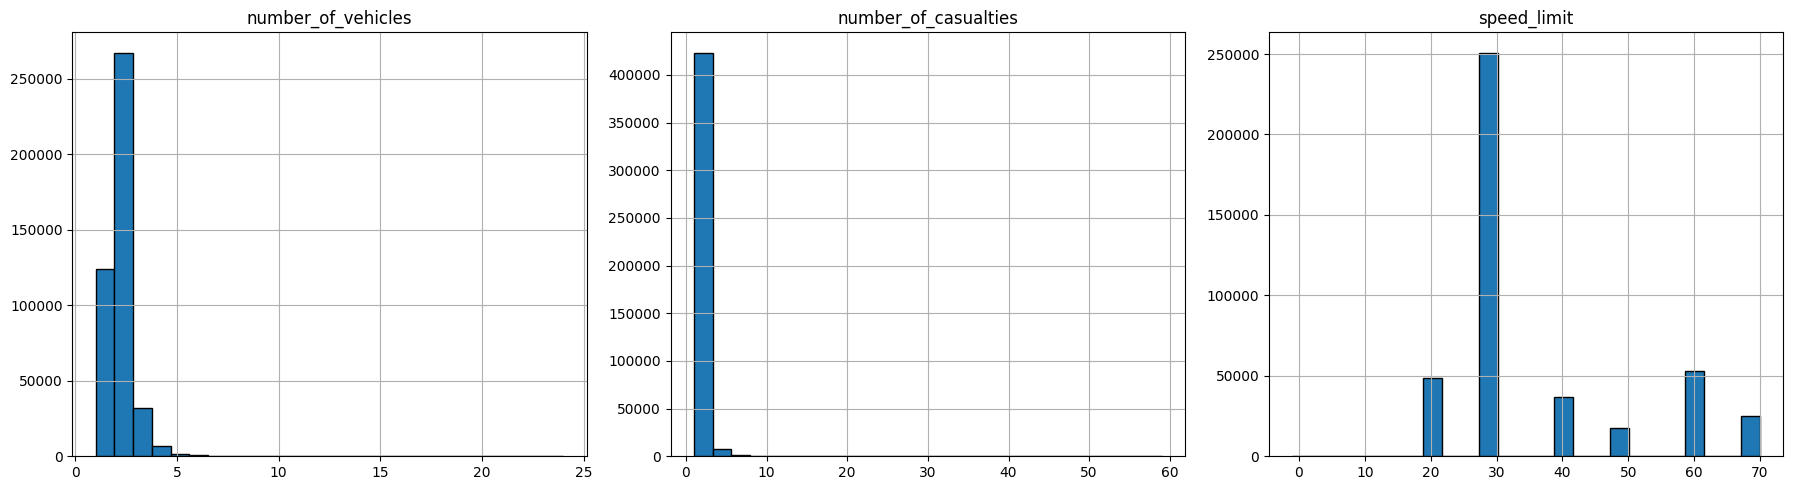

In [43]:
df_acc[['number_of_vehicles', 'number_of_casualties', 'speed_limit']].hist(bins=25, figsize=(30, 5), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

In [44]:
corr_matrix = df_acc[['serious_accident_flag', 'number_of_vehicles', 'number_of_casualties', 'speed_limit']].corr()
round(corr_matrix,4)

,serious_accident_flag,number_of_vehicles,number_of_casualties,speed_limit
serious_accident_flag,1.0000,-0.0740,0.0665,0.0842
number_of_vehicles,-0.0740,1.0000,0.2133,0.0890
number_of_casualties,0.0665,0.2133,1.0000,0.1663
speed_limit,0.0842,0.0890,0.1663,1.0000


## Categorical Variables

In [45]:
freq = df_acc['local_authority_highway'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'local_authority_highway': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,local_authority_highway,Frequency,Percent
90,Kent,13644,3.17
175,Surrey,10891,2.53
62,Essex,9288,2.15
10,Birmingham,9176,2.13
74,Hampshire,9119,2.12
...,...,...,...
114,Na h-Eileanan an Iar (Western Isles),81,0.02
103,London Airport (Heathrow),97,0.02
132,Orkney Islands,60,0.01
155,Shetland Islands,54,0.01


In [46]:
freq = df_acc['police_force'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'police_force': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,police_force,Frequency,Percent
29,Metropolitan Police,94343,22.21
48,West Midlands,19520,4.60
23,Kent,15764,3.71
49,West Yorkshire,14402,3.39
43,Sussex,14124,3.33
20,Hampshire,13862,3.26
45,Thames Valley,13136,3.09
18,Greater Manchester,12791,3.01
9,Devon and Cornwall,12293,2.89
14,Essex,11390,2.68


In [47]:
# pedestrian_crossing_physical_facilities

freq = df_acc['pedestrian_crossing_physical_facilities'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'pedestrian_crossing_physical_facilities': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,pedestrian_crossing_physical_facilities,Frequency,Percent
2,No physical crossing facilities within 50 metres,330919,78.81
3,Pedestrian phase at traffic signal junction,34829,8.30
4,"Pelican, puffin, toucan or similar non-junctio...",24365,5.80
5,Zebra,17678,4.21
0,Central refuge,11084,2.64
1,Footbridge or subway,994,0.24


In [48]:
pd.crosstab(index=df_acc['pedestrian_crossing_physical_facilities'],
            columns=df_acc['serious_accident_flag'],
            normalize='columns'
            ).round(3)*100

serious_accident_flag,0,1
pedestrian_crossing_physical_facilities,,
Central refuge,2.6,2.8
Footbridge or subway,0.2,0.2
No physical crossing facilities within 50 metres,78.2,81.2
Pedestrian phase at traffic signal junction,8.8,6.6
"Pelican, puffin, toucan or similar non-junction pedestrian light crossing",5.8,5.8
Zebra,4.4,3.4


In [49]:
contab_obs = pd.crosstab(
    df_acc['pedestrian_crossing_physical_facilities'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 7.895517568567548e-147
Dependent (reject H0)


In [50]:
# junction_detail

freq = df_acc['junction_detail'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'junction_detail': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,junction_detail,Frequency,Percent
3,Not at junction or within 20 metres,180619,42.33
8,T or staggered junction,122943,28.81
0,Crossroads,40443,9.48
6,Roundabout,34283,8.03
4,Other junction,21072,4.94
5,Private drive or entrance,9619,2.25
1,Mini-roundabout,6031,1.41
2,More than 4 arms (not roundabout),5865,1.37
7,Slip road,5842,1.37


In [51]:
contab_obs = pd.crosstab(
    df_acc['junction_detail'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [52]:
# road_type

freq = df_acc['road_type'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'road_type': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,road_type,Frequency,Percent
3,Single carriageway,313626,72.52
0,Dual carriageway,66568,15.39
2,Roundabout,25980,6.01
1,One way street,10296,2.38
5,Unknown,9148,2.12
4,Slip road,6839,1.58


In [53]:
contab_obs = pd.crosstab(
    df_acc['road_type'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [54]:
freq = df_acc['junction_control'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'junction_control': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,junction_control,Frequency,Percent
2,Give way or uncontrolled,188928,78.24
1,Auto traffic signal,48154,19.94
4,Stop sign,2757,1.14
0,Authorised person,1615,0.67
3,Not at junction or within 20 metres,4,0.00


In [55]:
contab_obs = pd.crosstab(
    df_acc['junction_control'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.851449008538407e-92
Dependent (reject H0)


In [56]:
freq = df_acc['light_conditions'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'light_conditions': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,light_conditions,Frequency,Percent
4,Daylight,310031,71.69
1,Darkness - lights lit,88055,20.36
3,Darkness - no lighting,21925,5.07
0,Darkness - lighting unknown,9289,2.15
2,Darkness - lights unlit,3144,0.73


In [57]:
contab_obs = pd.crosstab(
    df_acc['light_conditions'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [58]:
freq = df_acc['pedestrian_crossing_human_control'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'pedestrian_crossing_human_control': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,pedestrian_crossing_human_control,Frequency,Percent
2,None within 50 metres,411879,98.50
0,Control by other authorised person,4554,1.09
1,Control by school crossing patrol,1723,0.41


In [59]:
contab_obs = pd.crosstab(
    df_acc['pedestrian_crossing_human_control'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.00036739275588212514
Dependent (reject H0)


In [60]:
freq = df_acc['did_police_officer_attend_scene_of_accident'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'did_police_officer_attend_scene_of_accident': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,did_police_officer_attend_scene_of_accident,Frequency,Percent
2,Yes,301188,69.65
0,No,96899,22.41
1,No - accident was reported using a self comple...,34367,7.95


In [61]:
contab_obs = pd.crosstab(
    df_acc['did_police_officer_attend_scene_of_accident'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [62]:
# first_road_class

freq = df_acc['first_road_class'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'first_road_class': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,first_road_class,Frequency,Percent
0,A,191499,44.28
5,Unclassified,151119,34.94
2,B,52849,12.22
3,C,22325,5.16
4,Motorway,13514,3.12
1,A(M),1151,0.27


In [63]:
contab_obs = pd.crosstab(
    df_acc['first_road_class'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0090452232480209e-56
Dependent (reject H0)


In [64]:
freq = df_acc['second_road_class'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'second_road_class': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,second_road_class,Frequency,Percent
6,Unclassified,173494,52.42
5,Not at junction or within 20 metres,79437,24.00
0,A,45082,13.62
2,B,17019,5.14
3,C,13867,4.19
4,Motorway,1850,0.56
1,A(M),197,0.06


In [65]:
freq = df_acc['day_of_week'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'day_of_week': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,day_of_week,Frequency,Percent
0,Friday,70991,16.42
4,Thursday,65810,15.22
6,Wednesday,64639,14.95
5,Tuesday,63421,14.67
1,Monday,61130,14.14
2,Saturday,57922,13.39
3,Sunday,48544,11.23


In [66]:
contab_obs = pd.crosstab(
    df_acc['day_of_week'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.4733490628446185e-86
Dependent (reject H0)


In [67]:
freq = df_acc['urban_or_rural_area'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'urban_or_rural_area': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,urban_or_rural_area,Frequency,Percent
2,Urban,292640,67.67
0,Rural,139702,32.30
1,Unallocated,114,0.03


In [68]:
contab_obs = pd.crosstab(
    df_acc['urban_or_rural_area'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


In [69]:
freq = df_acc['weather_conditions'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'weather_conditions': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,weather_conditions,Frequency,Percent
0,1.0,343924,79.53
1,2.0,50091,11.58
8,9.0,12271,2.84
7,8.0,11488,2.66
4,5.0,5406,1.25
3,4.0,4640,1.07
2,3.0,2219,0.51
6,7.0,1780,0.41
5,6.0,606,0.14


In [70]:
contab_obs = pd.crosstab(
    df_acc['weather_conditions'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 4.028419667828426e-183
Dependent (reject H0)


In [71]:
# time_of_day

freq = df_acc['time_of_day'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'time_of_day': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,time_of_day,Frequency,Percent
4,3:00 pm to 5:59 pm,107048,24.75
2,12:00 pm to 2:59 pm,78898,18.24
6,6:00 pm to 7:59 pm,71314,16.49
7,9:00 am to 11:59 am,61022,14.11
5,6:00 am to 7:59 am,55178,12.76
8,9:00 pm to 11:59 pm,34835,8.06
3,3:00 am to 5:59 am,9700,2.24
1,12:00 am to 2:59 am,8031,1.86
0,,6431,1.49


In [72]:
contab_obs = pd.crosstab(
    df_acc['time_of_day'],
    df_acc['serious_accident_flag'],
    margins = False)

# chi = stats.chi2_contingency(contab_obs)
# print ('𝜒2 value, p-value, degree of freedom and expected values')
# chi

stat, p, dof, expected = stats.chi2_contingency(contab_obs)
 
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 2.9527615397138934e-247
Dependent (reject H0)


In [73]:
freq = df_acc['accident_severity'].value_counts().sort_index()
freq_table = pd.DataFrame({
  'accident_severity': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,accident_severity,Frequency,Percent
2,Slight,340676,78.78
1,Serious,85587,19.79
0,Fatal,6194,1.43


# Export - for Tableau Viz

In [74]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432457 entries, 0 to 432456
Data columns (total 54 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    432457 non-null  object 
 1   accident_year                                     432457 non-null  int64  
 2   accident_reference                                432457 non-null  object 
 3   location_easting_osgr                             432343 non-null  float64
 4   location_northing_osgr                            432343 non-null  float64
 5   longitude                                         432343 non-null  float64
 6   latitude                                          432343 non-null  float64
 7   police_force_code                                 432457 non-null  int64  
 8   accident_severity_code                            432457 non-null  int64  
 9   numb

In [75]:
# Drop some columns
df_acc_export = df_acc.drop(['police_force_code',
                      'accident_severity_code',
                        'day_of_week_code',
                    'local_authority_district_code',
                    'local_authority_highway_code',
                    'first_road_class_code',
                    'junction_detail_code',
                    'junction_control_code',
                    'second_road_class_code',
                    'pedestrian_crossing_human_control_code',
                    'pedestrian_crossing_physical_facilities_code',
                    'light_conditions_code',
                    'urban_or_rural_area_code',
                    'did_police_officer_attend_scene_of_accident_code'
                    ],
                    axis=1)
df_acc_export.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432457 entries, 0 to 432456
Data columns (total 40 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               432457 non-null  object 
 1   accident_year                                432457 non-null  int64  
 2   accident_reference                           432457 non-null  object 
 3   location_easting_osgr                        432343 non-null  float64
 4   location_northing_osgr                       432343 non-null  float64
 5   longitude                                    432343 non-null  float64
 6   latitude                                     432343 non-null  float64
 7   number_of_vehicles                           432457 non-null  int64  
 8   number_of_casualties                         432457 non-null  int64  
 9   date                                         432457 non-nul

df_acc_export = df_acc_export.astype({'weather_conditions':'int', 'road_surface_conditions':'int'})
df_acc_export.info()

In [76]:
df_acc_export.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,...,pedestrian_crossing_human_control,did_police_officer_attend_scene_of_accident,first_road_class,second_road_class,day_of_week,urban_or_rural_area,accident_severity,time_hour,time_of_day,serious_accident_flag
0,2018010080971,2018,10080971,529150.0,182270.0,-0.139737,51.524587,2,2,01/01/2018,...,None within 50 metres,Yes,A,NaN,Monday,Urban,Slight,01,12:00 am to 2:59 am,0
1,2018010080973,2018,10080973,542020.0,184290.0,0.046471,51.539651,1,1,01/01/2018,...,None within 50 metres,Yes,B,Unclassified,Monday,Urban,Slight,00,,0
2,2018010080974,2018,10080974,531720.0,182910.0,-0.102474,51.529746,2,1,01/01/2018,...,None within 50 metres,Yes,A,C,Monday,Urban,Slight,00,,0
3,2018010080981,2018,10080981,541450.0,183220.0,0.037828,51.530179,2,1,01/01/2018,...,None within 50 metres,Yes,B,A,Monday,Urban,Serious,03,3:00 am to 5:59 am,1
4,2018010080982,2018,10080982,543580.0,176500.0,0.065781,51.469258,2,2,01/01/2018,...,None within 50 metres,Yes,A,NaN,Monday,Urban,Serious,02,12:00 am to 2:59 am,1


In [77]:
df_acc_export.to_csv('../data/processed/road_accident_clean.csv', index=False)

# Cluster Analysis

In [78]:
# Select the variables for clustering

df_clusbase = df_acc[['day_of_week',
                     'time_of_day',
                     'first_road_class',
                     'road_type',
                     'speed_limit',
                     'junction_detail',
                     'junction_control',
                     'second_road_class',
                     'pedestrian_crossing_human_control',
                     'pedestrian_crossing_physical_facilities',
                     'light_conditions',
                     'weather_conditions',
                     'road_surface_conditions',
                     'special_conditions_at_site',
                     'carriageway_hazards'
                     ]]
df_clusbase

,day_of_week,time_of_day,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
0,Monday,12:00 am to 2:59 am,A,Dual carriageway,30,Not at junction or within 20 metres,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,1.0,1.0,0.0,0.0
1,Monday,,B,Single carriageway,30,Mini-roundabout,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,1.0,1.0,0.0,0.0
2,Monday,,A,Single carriageway,20,Crossroads,Give way or uncontrolled,C,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,1.0,1.0,0.0,0.0
3,Monday,3:00 am to 5:59 am,B,Dual carriageway,30,More than 4 arms (not roundabout),Auto traffic signal,A,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,2.0,2.0,0.0,0.0
4,Monday,12:00 am to 2:59 am,A,Single carriageway,30,Not at junction or within 20 metres,NaN,NaN,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432452,Wednesday,9:00 am to 11:59 am,Unclassified,Single carriageway,20,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,1.0,1.0,0.0,0.0
432453,Saturday,9:00 pm to 11:59 pm,A,Single carriageway,60,Not at junction or within 20 metres,NaN,Not at junction or within 20 metres,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - no lighting,1.0,1.0,0.0,0.0
432454,Saturday,12:00 pm to 2:59 pm,B,Single carriageway,60,Other junction,Stop sign,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,1.0,1.0,0.0,0.0
432455,Friday,3:00 pm to 5:59 pm,A,Unknown,20,T or staggered junction,Auto traffic signal,A,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,9.0,1.0,0.0,0.0


In [79]:
df_clusbase.shape

(432457, 15)

In [80]:
# Drop rows with missing

df_clusbase_nomiss = df_clusbase.dropna(axis=0, how='any')
df_clusbase_nomiss.shape

(231872, 15)

In [81]:
df_clusbase_nomiss

,day_of_week,time_of_day,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards
1,Monday,,B,Single carriageway,30,Mini-roundabout,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,1.0,1.0,0.0,0.0
2,Monday,,A,Single carriageway,20,Crossroads,Give way or uncontrolled,C,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,1.0,1.0,0.0,0.0
3,Monday,3:00 am to 5:59 am,B,Dual carriageway,30,More than 4 arms (not roundabout),Auto traffic signal,A,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness - lights lit,2.0,2.0,0.0,0.0
6,Monday,3:00 am to 5:59 am,C,Single carriageway,30,Mini-roundabout,Give way or uncontrolled,C,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,1.0,1.0,0.0,0.0
7,Monday,3:00 am to 5:59 am,A,One way street,30,Slip road,Give way or uncontrolled,A,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lighting unknown,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432447,Friday,12:00 pm to 2:59 pm,Unclassified,Single carriageway,30,T or staggered junction,Give way or uncontrolled,A,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,1.0,2.0,0.0,0.0
432449,Saturday,12:00 pm to 2:59 pm,Unclassified,Single carriageway,20,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,1.0,1.0,0.0,0.0
432452,Wednesday,9:00 am to 11:59 am,Unclassified,Single carriageway,20,T or staggered junction,Give way or uncontrolled,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,1.0,1.0,0.0,0.0
432454,Saturday,12:00 pm to 2:59 pm,B,Single carriageway,60,Other junction,Stop sign,Unclassified,None within 50 metres,No physical crossing facilities within 50 metres,Daylight,1.0,1.0,0.0,0.0


In [82]:
from sklearn.preprocessing import OneHotEncoder

In [83]:
# Create binary variables for evefy level of a feature

df_scaled = OneHotEncoder().fit_transform(df_clusbase_nomiss).toarray()
# print(df_scaled)

In [84]:
from sklearn.cluster import KMeans

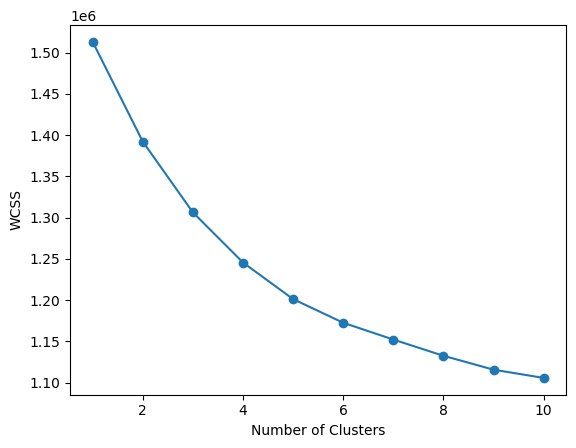

In [103]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)
    
 
plt.plot(range(1, 11), errors, marker = 'o')
# plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [86]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 101)

In [87]:
kmeans.fit(df_scaled)

KMeans(n_clusters=5, random_state=101)

In [88]:
df_acc_clus= df_clusbase_nomiss.copy()
df_acc_clus['kmeans_segments'] = kmeans.labels_
df_kmseg = df_acc_clus['kmeans_segments']

df_acc_clus_profile = df_acc_export.join(df_kmseg)
df_acc_clus_profile

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,date,...,did_police_officer_attend_scene_of_accident,first_road_class,second_road_class,day_of_week,urban_or_rural_area,accident_severity,time_hour,time_of_day,serious_accident_flag,kmeans_segments
0,2018010080971,2018,10080971,529150.0,182270.0,-0.139737,51.524587,2,2,01/01/2018,...,Yes,A,NaN,Monday,Urban,Slight,01,12:00 am to 2:59 am,0,NaN
1,2018010080973,2018,10080973,542020.0,184290.0,0.046471,51.539651,1,1,01/01/2018,...,Yes,B,Unclassified,Monday,Urban,Slight,00,,0,1.0
2,2018010080974,2018,10080974,531720.0,182910.0,-0.102474,51.529746,2,1,01/01/2018,...,Yes,A,C,Monday,Urban,Slight,00,,0,2.0
3,2018010080981,2018,10080981,541450.0,183220.0,0.037828,51.530179,2,1,01/01/2018,...,Yes,B,A,Monday,Urban,Serious,03,3:00 am to 5:59 am,1,2.0
4,2018010080982,2018,10080982,543580.0,176500.0,0.065781,51.469258,2,2,01/01/2018,...,Yes,A,NaN,Monday,Urban,Serious,02,12:00 am to 2:59 am,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432452,2021991196247,2021,991196247,325546.0,674548.0,-3.194076,55.958152,2,1,22/09/2021,...,Yes,Unclassified,Unclassified,Wednesday,Urban,Slight,09,9:00 am to 11:59 am,0,1.0
432453,2021991196607,2021,991196607,271195.0,558271.0,-4.010304,54.902512,2,2,11/09/2021,...,Yes,A,Not at junction or within 20 metres,Saturday,Rural,Slight,21,9:00 pm to 11:59 pm,0,NaN
432454,2021991197944,2021,991197944,357297.0,860768.0,-2.716825,57.634805,1,1,17/04/2021,...,Yes,B,Unclassified,Saturday,Rural,Slight,14,12:00 pm to 2:59 pm,0,1.0
432455,2021991200639,2021,991200639,326936.0,675925.0,-3.172192,55.970735,1,1,17/09/2021,...,No,A,A,Friday,Urban,Slight,17,3:00 pm to 5:59 pm,0,2.0


#### Cluster Groups

In [89]:
freq = df_acc_clus_profile['kmeans_segments'].value_counts().sort_index()

freq_table = pd.DataFrame({
  'kmeans_segments': freq.index,
  'Frequency': freq.values,
  'Percent': ((freq.values/freq.values.sum())*100).round(2),
})
# freq_table.sort_values(by=['Percent'], inplace=True, ascending=False)
freq_table

,kmeans_segments,Frequency,Percent
0,0.0,45198,19.49
1,1.0,76368,32.94
2,2.0,36864,15.90
3,3.0,29775,12.84
4,4.0,43667,18.83


#### Cluster Profiling

In [90]:
pd.crosstab(index=df_acc_clus_profile['accident_severity'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
accident_severity,,,,,
Fatal,1.0,0.8,0.9,0.6,1.4
Serious,19.8,20.2,17.2,15.1,21.3
Slight,79.2,78.9,81.9,84.3,77.3


In [91]:
pd.crosstab(index=df_acc_clus_profile['time_of_day'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
time_of_day,,,,,
,1.6,1.0,2.0,1.3,1.1
12:00 am to 2:59 am,1.8,1.1,2.3,1.7,1.3
12:00 pm to 2:59 pm,13.9,20.1,16.6,19.0,20.8
3:00 am to 5:59 am,2.4,1.2,2.5,2.4,1.4
3:00 pm to 5:59 pm,24.1,27.1,22.0,22.7,26.0
6:00 am to 7:59 am,15.1,12.0,11.5,15.0,11.9
6:00 pm to 7:59 pm,19.3,16.2,18.7,15.5,15.3
9:00 am to 11:59 am,12.5,15.0,13.1,15.2,15.7
9:00 pm to 11:59 pm,9.3,6.3,11.3,7.1,6.5


In [92]:
pd.crosstab(index=df_acc_clus_profile['road_type'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
road_type,,,,,
Dual carriageway,7.6,2.8,31.1,19.8,13.1
One way street,2.2,2.5,4.1,0.8,2.3
Roundabout,3.7,1.1,2.2,65.4,0.1
Single carriageway,84.6,92.1,60.1,8.2,83.1
Slip road,1.2,0.7,1.5,5.4,1.0
Unknown,0.7,0.9,1.1,0.3,0.5


In [93]:
pd.crosstab(index=df_acc_clus_profile['speed_limit'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
speed_limit,,,,,
-1,0.0,0.0,0.0,0.0,0.0
20,10.9,14.0,14.9,4.3,11.4
30,67.3,73.7,70.1,48.2,60.2
40,7.4,4.1,11.5,18.0,10.0
50,3.1,1.2,2.3,7.4,5.1
60,10.1,6.9,0.7,10.7,12.0
70,1.2,0.1,0.4,11.4,1.3


In [94]:
pd.crosstab(index=df_acc_clus_profile['junction_detail'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
junction_detail,,,,,
Crossroads,12.8,13.7,49.4,0.6,8.0
Mini-roundabout,3.2,3.2,0.1,4.0,1.1
More than 4 arms (not roundabout),1.5,1.3,8.5,0.5,1.5
Not at junction or within 20 metres,0.0,0.0,0.0,0.0,0.0
Other junction,9.6,9.1,7.3,1.6,11.7
Private drive or entrance,4.2,5.2,0.4,0.0,6.5
Roundabout,6.3,2.6,4.2,85.2,1.9
Slip road,2.3,0.7,1.5,7.3,2.4
T or staggered junction,60.2,64.2,28.5,0.8,66.8


In [95]:
pd.crosstab(index=df_acc_clus_profile['junction_control'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
junction_control,,,,,
Authorised person,0.7,0.8,0.5,0.5,0.7
Auto traffic signal,5.4,1.9,98.2,10.8,2.2
Give way or uncontrolled,92.5,96.0,0.9,88.2,95.7
Stop sign,1.4,1.3,0.5,0.5,1.4


In [96]:
pd.crosstab(index=df_acc_clus_profile['pedestrian_crossing_physical_facilities'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
pedestrian_crossing_physical_facilities,,,,,
Central refuge,3.7,3.0,2.5,5.1,3.7
Footbridge or subway,0.1,0.1,0.4,1.0,0.2
No physical crossing facilities within 50 metres,81.9,87.1,17.3,82.3,78.0
Pedestrian phase at traffic signal junction,2.8,1.2,61.7,1.5,4.0
"Pelican, puffin, toucan or similar non-junction pedestrian light crossing",6.1,3.6,15.5,5.5,9.1
Zebra,5.3,5.0,2.6,4.6,5.0


In [97]:
pd.crosstab(index=df_acc_clus_profile['light_conditions'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
light_conditions,,,,,
Darkness - lighting unknown,2.1,1.5,1.6,1.8,1.3
Darkness - lights lit,37.0,15.9,31.9,21.3,16.6
Darkness - lights unlit,1.2,0.5,0.6,0.7,0.4
Darkness - no lighting,5.5,1.6,0.2,1.2,2.1
Daylight,54.3,80.5,65.7,75.0,79.5


['day_of_week',
                     'time_of_day',
                     'first_road_class',
                     'road_type',
                     'speed_limit',
                     'junction_detail',
                     'junction_control',
                     'second_road_class',
                     'pedestrian_crossing_human_control',
                     'pedestrian_crossing_physical_facilities',
                     'light_conditions',
                     'weather_conditions',
                     'road_surface_conditions',
                     'special_conditions_at_site',
                     'carriageway_hazards'

In [98]:
pd.crosstab(index=df_acc_clus_profile['did_police_officer_attend_scene_of_accident'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
did_police_officer_attend_scene_of_accident,,,,,
No,17.5,25.3,17.8,25.9,15.9
No - accident was reported using a self completion form (self rep only),3.6,4.2,7.9,6.3,4.7
Yes,78.9,70.5,74.3,67.7,79.4


In [99]:
pd.crosstab(index=df_acc_clus_profile['urban_or_rural_area'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
urban_or_rural_area,,,,,
Rural,25.6,20.0,6.1,43.5,28.1
Unallocated,0.0,0.0,0.0,0.1,0.0
Urban,74.3,80.0,93.9,56.4,71.8


In [100]:
pd.crosstab(index=df_acc_clus_profile['local_authority_highway'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
local_authority_highway,,,,,
Aberdeen City,0.1,0.1,0.2,0.2,0.1
Aberdeenshire,0.1,0.1,0.0,0.1,0.2
Angus,0.1,0.1,0.0,0.1,0.1
Argyll & Bute,0.1,0.0,0.0,0.0,0.1
Barking and Dagenham,0.4,0.4,0.8,0.4,0.6
...,...,...,...,...,...
Wokingham,0.2,0.2,0.1,0.3,0.2
Wolverhampton,0.6,0.5,0.8,0.4,0.4
Worcestershire,0.8,0.8,0.4,1.1,0.7


In [101]:
pd.crosstab(index=df_acc_clus_profile['police_force'],
            columns=df_acc_clus_profile['kmeans_segments'],
            normalize='columns'
            ).round(3)*100

kmeans_segments,0.0,1.0,2.0,3.0,4.0
police_force,,,,,
Avon and Somerset,2.9,2.6,1.7,2.6,2.8
Bedfordshire,1.0,1.1,0.6,1.5,0.6
Cambridgeshire,1.1,1.4,0.5,1.9,0.8
Central,0.2,0.1,0.0,0.2,0.2
Cheshire,1.7,1.4,1.5,2.6,1.6
City of London,0.1,0.2,0.8,0.0,0.3
Cleveland,0.5,0.8,0.7,0.8,0.5
Cumbria,0.6,0.7,0.2,0.5,0.8
Derbyshire,1.3,1.6,0.8,2.0,1.6


#### Export for Tableau

In [102]:
df_acc_clus_profile.to_csv('../data/processed/kmeans_segments.csv', index=False)